###**Intro**
In this notebook, I am exploring how trader's performance changes based on market sentiment. For this I have combined sentiment data with historical trading data to analyse how factors like profitability, trading volume and win rate behaviour patterns change during Fear, Greed and Neutral phases.  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sentiment_path = '/content/drive/MyDrive/ds_Saloni_Jain/csv_files/fear_greed_index.csv'
trader_path = '/content/drive/MyDrive/ds_Saloni_Jain/csv_files/historical_data.csv'

In [ ]:
trader_df = pd.read_csv(trader_path)
sentiment_df = pd.read_csv(sentiment_path)
print('Trader Data')
print(trader_df.shape)
print(trader_df.head())
print('Sentiment Data')
print(sentiment_df.shape)
print(sentiment_df.head())

Trader Data
(211224, 16)
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  

In [ ]:
print("Trader Data Nulls:\n", trader_df.isnull().sum())
print("Trader Data Duplicates:", trader_df.duplicated().sum())
print(trader_df.info())

print("\nSentiment Data Nulls:\n", sentiment_df.isnull().sum())
print("Sentiment Data Duplicates:", sentiment_df.duplicated().sum())
print(sentiment_df.info())


Trader Data Nulls:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64
Trader Data Duplicates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float6

In [ ]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['classification'] = sentiment_df['classification'].replace({
    'Extreme Fear': 'Fear',
    'Fear': 'Fear',
    'Neutral': 'Neutral',
    'Greed': 'Greed',
    'Extreme Greed': 'Greed'
})

Here I grouped some labels of dataset like 'Extreme Fear' and 'Extreme Greed' mainly into Fear, Greed and neutral only as assignment mainly focuses on it.

In [ ]:
trader_df['Timestamp IST'] = pd.to_datetime(
    trader_df['Timestamp IST'],
    format='%d-%m-%Y %H:%M',
    errors='coerce'
)
trader_df['date'] = trader_df['Timestamp IST'].dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])

Here I extracted only date part from trader data to merge it with sentiment file.

In [ ]:
merged_df = trader_df.merge(
    sentiment_df[['date','classification']],
    on='date',
    how='left'
)
merged_df[['Timestamp IST','date','classification']].head(10)

,Timestamp IST,date,classification
0,2024-12-02 22:50:00,2024-12-02,Greed
1,2024-12-02 22:50:00,2024-12-02,Greed
2,2024-12-02 22:50:00,2024-12-02,Greed
3,2024-12-02 22:50:00,2024-12-02,Greed
4,2024-12-02 22:50:00,2024-12-02,Greed
5,2024-12-02 22:50:00,2024-12-02,Greed
6,2024-12-02 22:50:00,2024-12-02,Greed
7,2024-12-02 22:50:00,2024-12-02,Greed
8,2024-12-02 22:50:00,2024-12-02,Greed
9,2024-12-02 22:50:00,2024-12-02,Greed


Here I merged both datasets on 'date' column to help me link each trade with correct market sentiment on that day.

In [ ]:
merged_df['win'] = merged_df['Closed PnL'] > 0
merged_df['trade_volume'] = merged_df['Size Tokens'].abs()

I added a 'win' column to see if trade was profitable or not and calculated 'trade_volume' column using size of trade.

###**Average PnL during Fear vs Greed**


In [ ]:
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean()
print("Average PnL:\n", avg_pnl)

Average PnL:
 classification
Fear       49.212077
Greed      53.882281
Neutral    34.307718
Name: Closed PnL, dtype: float64


###**Win Rate (%)**

In [ ]:
win_rate = merged_df.groupby('classification')['win'].mean() * 100
print("Win Rate (%):\n", win_rate)


Win Rate (%):
 classification
Fear       40.787150
Greed      42.031120
Neutral    39.699093
Name: win, dtype: float64


###**Total trading volume**

In [ ]:
volume = merged_df.groupby('classification')['trade_volume'].sum()
print("Volume:\n", volume)

Volume:
 classification
Fear       2.209201e+08
Greed      5.904211e+08
Neutral    1.651916e+08
Name: trade_volume, dtype: float64


###**Buy vs Sell Behavior**

In [ ]:
buy_sell = merged_df.groupby(['classification', 'Side']).size()
print("Buy vs Sell:\n", buy_sell)


Buy vs Sell:
 classification  Side
Fear            BUY     41205
                SELL    42032
Greed           BUY     42516
                SELL    47779
Neutral         BUY     18969
                SELL    18717
dtype: int64


##**Outputs**

In [ ]:
import os
os.makedirs('/content/drive/MyDrive/ds_Saloni_Jain/outputs', exist_ok=True)


###**PnL Comparison**

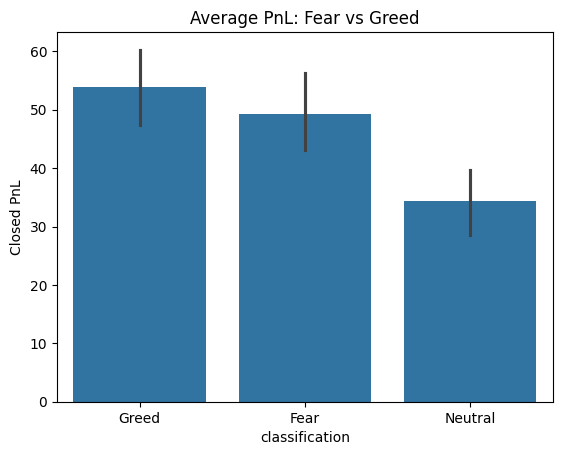

In [ ]:
sns.barplot(data=merged_df, x='classification', y='Closed PnL')
plt.title("Average PnL: Fear vs Greed")
plt.savefig('/content/drive/MyDrive/ds_Saloni_Jain/outputs/pnl_by_sentiment.png')
plt.show()

Here I calculated the average profit/loss for Fear, Greed, and Neutral days.
This shows how profitable traders were during each sentiment phase. From the
results, Greed days seem to have slightly higher PnL.

###**Win Rate Comparison**

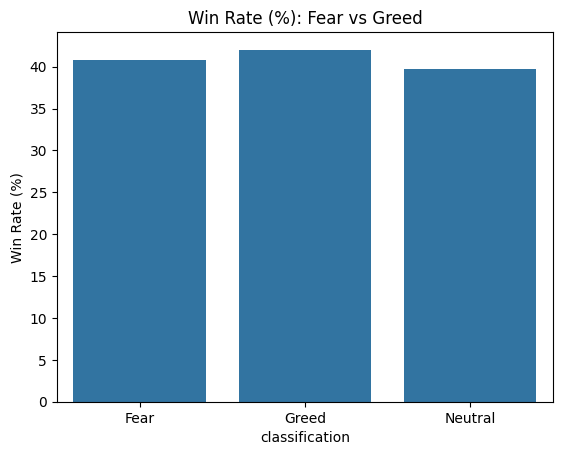

In [ ]:
sns.barplot(x=win_rate.index, y=win_rate.values)
plt.title("Win Rate (%): Fear vs Greed")
plt.ylabel("Win Rate (%)")
plt.savefig('/content/drive/MyDrive/ds_Saloni_Jain/outputs/winrate_fear_vs_greed.png')
plt.show()

This section shows what percentage of trades were profitable in each sentiment
group. The win rate does not change drastically, but Greed has a bit more.
This suggests traders probably take bigger positions during Greed.

###**Trading Volume Comaprison**

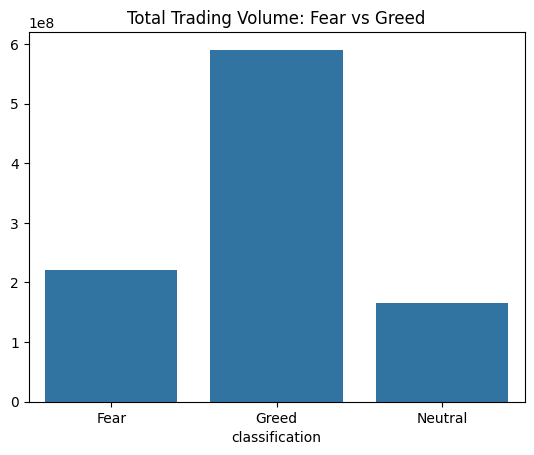

In [ ]:
sns.barplot(x=volume.index, y=volume.values)
plt.title("Total Trading Volume: Fear vs Greed")
plt.savefig('/content/drive/MyDrive/ds_Saloni_Jain/outputs/trade_volume_fear_greed.png')
plt.show()

I calculated total trading volume under each sentiment. Greed Days show the highest activity indicating traders tend to make more trades when market feels optimistic.

###**Buy vs Sell comparison**

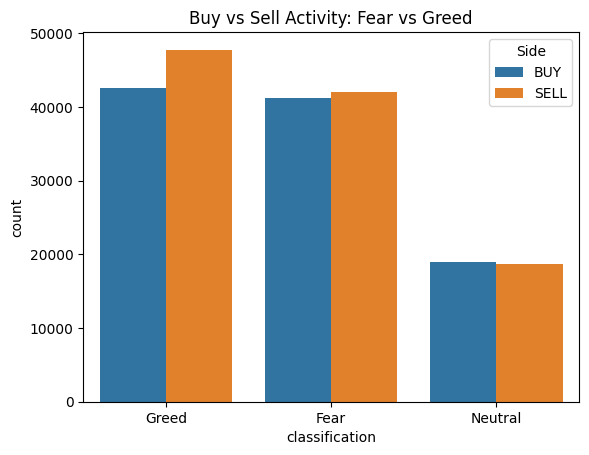

In [ ]:
sns.countplot(data=merged_df, x='classification', hue='Side')
plt.title("Buy vs Sell Activity: Fear vs Greed")
plt.savefig('/content/drive/MyDrive/ds_Saloni_Jain/outputs/buy_sell_fear_greed.png')
plt.show()

This plot compares how many Buy vs Sell trades happen in each sentiment
category. Surprisingly, even during Greed, Sell trades increase, which can be
due to profit-taking or short-term reversal strategies.

###**Correlation Heatmap of Trading Features**

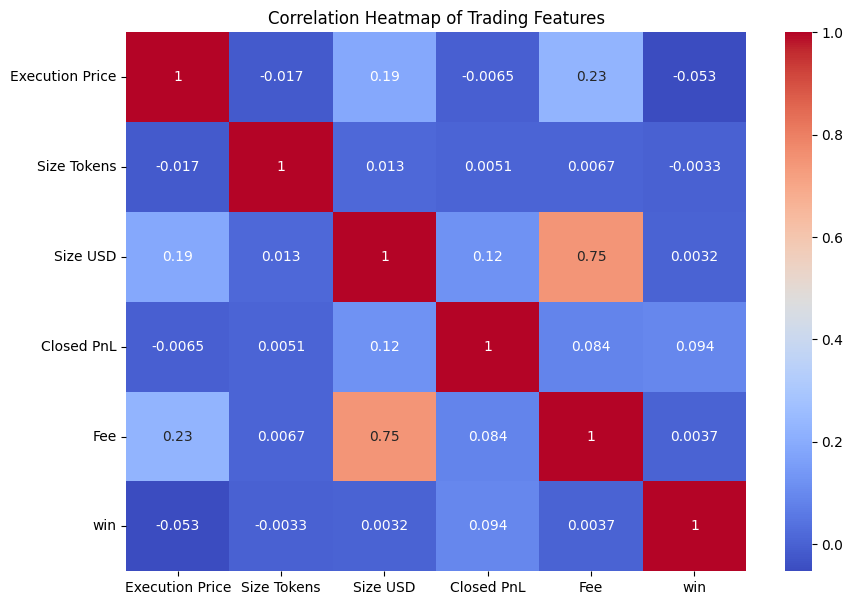

In [ ]:
plt.figure(figsize=(10,7))
corr = merged_df[['Execution Price', 'Size Tokens', 'Size USD',
                  'Closed PnL', 'Fee', 'win']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Trading Features")
plt.savefig('/content/drive/MyDrive/ds_Saloni_Jain/outputs/correlation_heatmap.png')
plt.show()


I created a heatmap to see how different numerical features relate to each
other. The strongest relationships were between trade size and USD amount
(which is expected). PnL is not strongly correlated with size, which shows
that big trades don't always mean big profits.

###**Time Series PnL Trend**

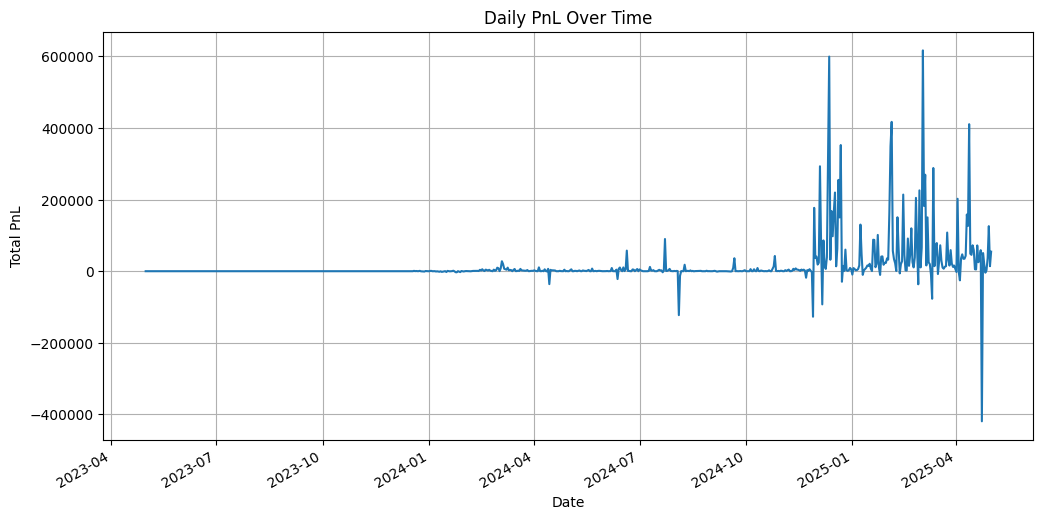

In [ ]:
daily_pnl = merged_df.groupby('date')['Closed PnL'].sum()

plt.figure(figsize=(12,6))
daily_pnl.plot()
plt.title("Daily PnL Over Time")
plt.xlabel("Date")
plt.ylabel("Total PnL")
plt.grid(True)
plt.savefig('/content/drive/MyDrive/ds_Saloni_Jain/outputs/pnl_timeseries.png')
plt.show()

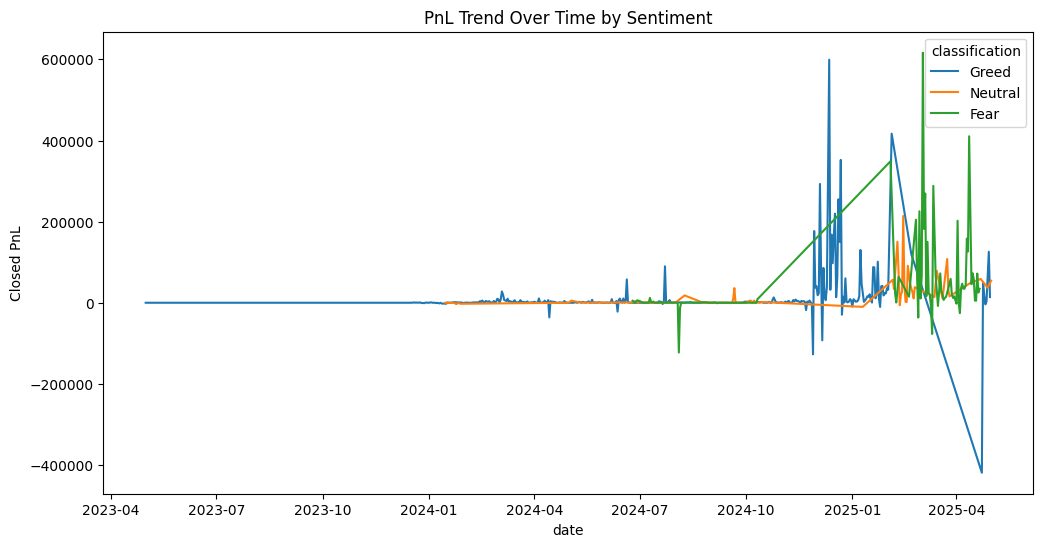

In [ ]:
sentiment_pnl = merged_df.groupby(['date','classification'])['Closed PnL'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=sentiment_pnl, x='date', y='Closed PnL', hue='classification')
plt.title("PnL Trend Over Time by Sentiment")
plt.savefig('/content/drive/MyDrive/ds_Saloni_Jain/outputs/pnl_timeseries_sentiment.png')
plt.show()

Here I plotted how the total PnL changes over time. This helps identify
periods where traders made more profits or losses. Some spikes line up
with Greed periods, showing that sentiment affects overall movement.

###**PnL Distribution**

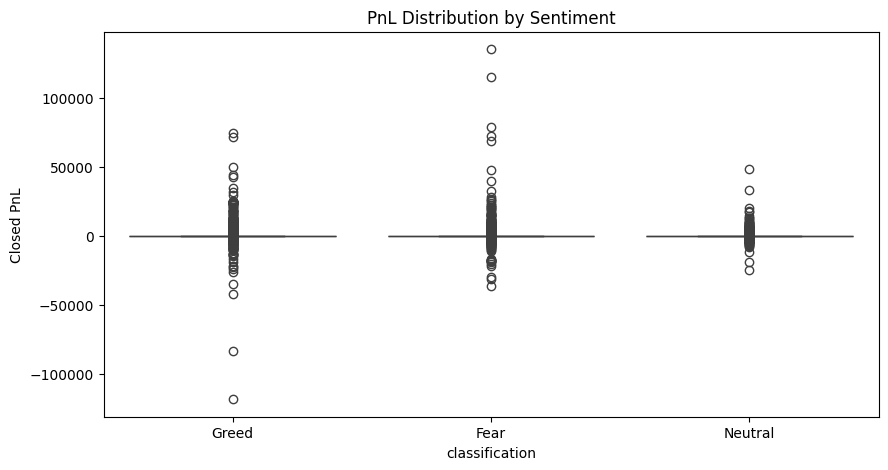

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title("PnL Distribution by Sentiment")
plt.savefig('/content/drive/MyDrive/ds_Saloni_Jain/outputs/pnl_distribution.png')
plt.show()

This boxplot shows how PnL varies under Fear, Greed, and Neutral.
Greed has the widest spread, meaning traders take bigger risks.
Fear days are more stable with smaller but steadier profits.

###**Trader Clustering**

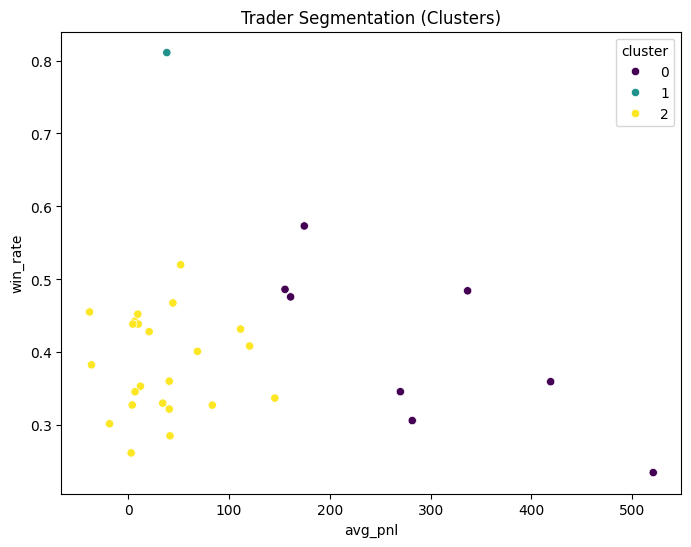

In [ ]:
trader_stats = merged_df.groupby('Account').agg({
    'Closed PnL':'mean',
    'win':'mean',
    'trade_volume':'sum'
}).reset_index()

trader_stats.columns = ['Account', 'avg_pnl', 'win_rate', 'total_volume']
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = trader_stats[['avg_pnl', 'win_rate', 'total_volume']]
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
trader_stats['cluster'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(data=trader_stats, x='avg_pnl', y='win_rate', hue='cluster', palette='viridis')
plt.title("Trader Segmentation (Clusters)")
plt.savefig('/content/drive/MyDrive/ds_Saloni_Jain/outputs/trader_clusters.png')
plt.show()


I used KMeans clustering to group traders based on their average PnL,
win rate, and total volume. This helps identify different trading
styles. For example:
- Cluster 0: Safe traders (high win rate, low volume)
- Cluster 1: High-volume aggressive traders
- Cluster 2: Risky low-performance traders
This kind of segmentation can help improve trading strategies.

## **Final Summary**

Overall, trader behaviour clearly changes with sentiment:
- Greed days have higher volume and higher profits.
- Win rate is slightly higher during Greed.
- Fear days are more stable and cautious.
- Neutral days perform the worst.
- Clustering also shows different trader types based on behavior.

These insights can help create better risk management and trading rules.

##**Extra Exploration**

###**Pipeline Demo**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Selecting features to include
num_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Fee']
cat_cols = ['Side', 'classification']

# Preprocessor
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocess)
])

pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Execution Price',
                                                   'Size Tokens', 'Size USD',
                                                   'Fee']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Side',
                                                   'classification'])]))])

In this section, I am preparing a basic preprocessing pipeline.
I am not building a prediction model here, but this structure shows how I would
organize features if we wanted to predict trade outcomes in the future.
If we wanted to train a model later (e.g., predict win/loss), we could plug this
pipeline directly into a classifier. This shows how data would flow into a model.

###**PnL During Sentiment Shifts**

In [ ]:
sentiment_df['prev_sentiment'] = sentiment_df['classification'].shift(1)
sentiment_df['sentiment_shift'] = sentiment_df['prev_sentiment'] + " → " + sentiment_df['classification']

shift_pnl = merged_df.merge(sentiment_df[['date', 'sentiment_shift']], on='date', how='left')
shift_pnl.groupby('sentiment_shift')['Closed PnL'].mean().dropna()

,Closed PnL
sentiment_shift,
Fear → Fear,49.797042
Fear → Greed,165.493008
Fear → Neutral,47.278627
Greed → Fear,144.532692
Greed → Greed,60.047501
Greed → Neutral,28.181647
Neutral → Fear,31.800622
Neutral → Greed,-15.727077
Neutral → Neutral,28.769170


This sections shows what happens when market sentiment flips from fear to greed or vice-versa. These transitions are often volatile so analyzing them can help us understand whether sudden mood changes create better trading opportunities or not